## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report
from keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

2023-03-05 02:49:53.030033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 02:49:53.164172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 02:49:53.164196: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 02:49:53.191283: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-05 02:49:53.741126: W tensorflow/stream_executor/platform/de

## Loading Data

In [2]:
data = pd.read_csv("../csv/Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Exploring Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


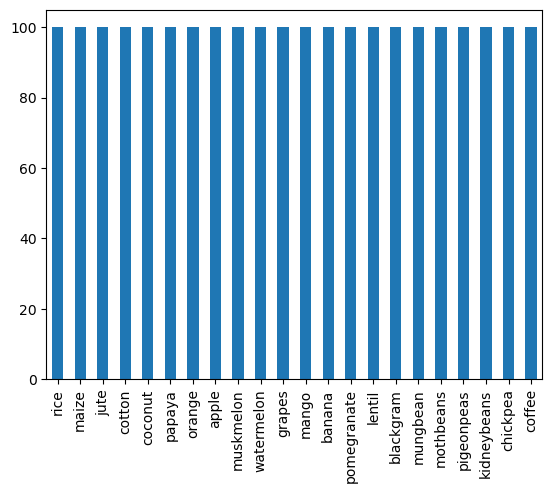

In [4]:
labels = data["label"].unique()
data["label"].value_counts().plot(kind="bar")
plt.show()

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Univariate Analysis

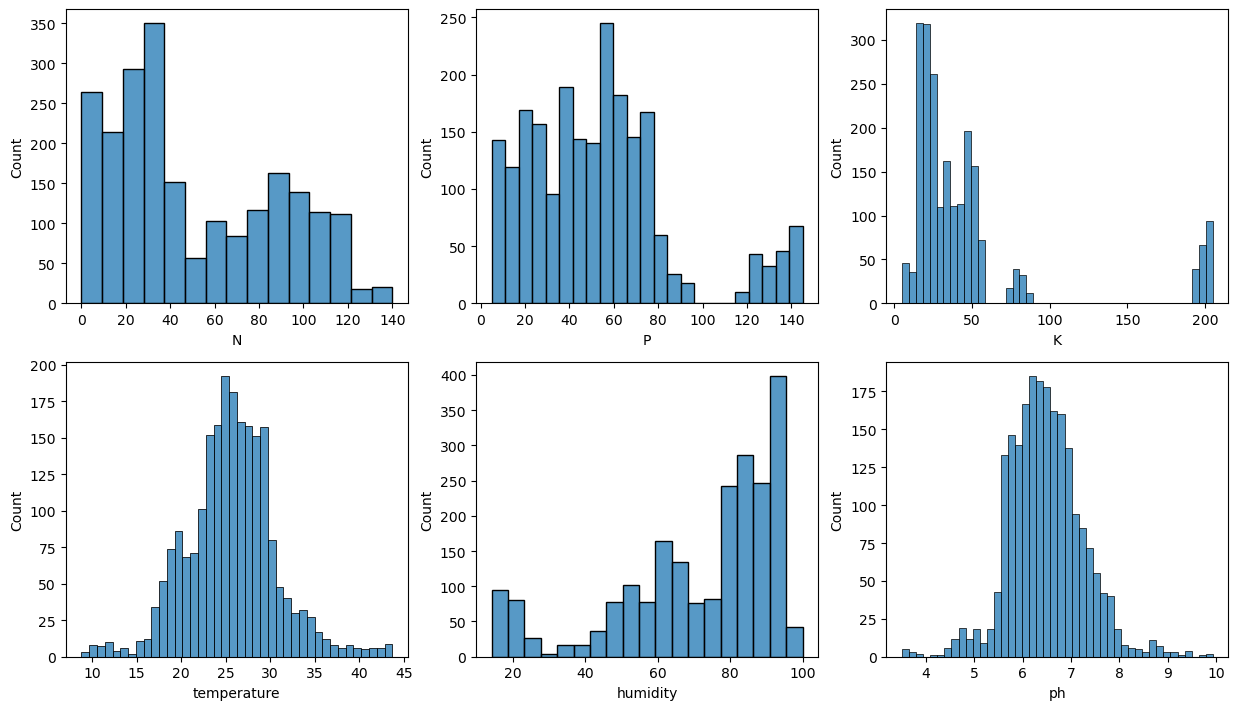

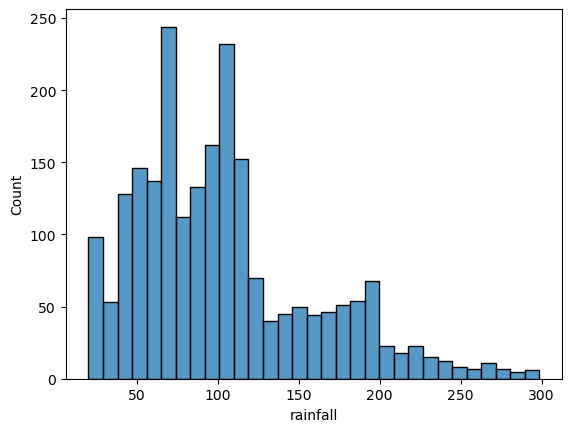

In [7]:
col = data.columns[:-1]
plt.figure(figsize=(15,13))
i = 1
for column in col[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()
sns.histplot(data[col[-1]])
plt.show()

## Bivariate Analysis

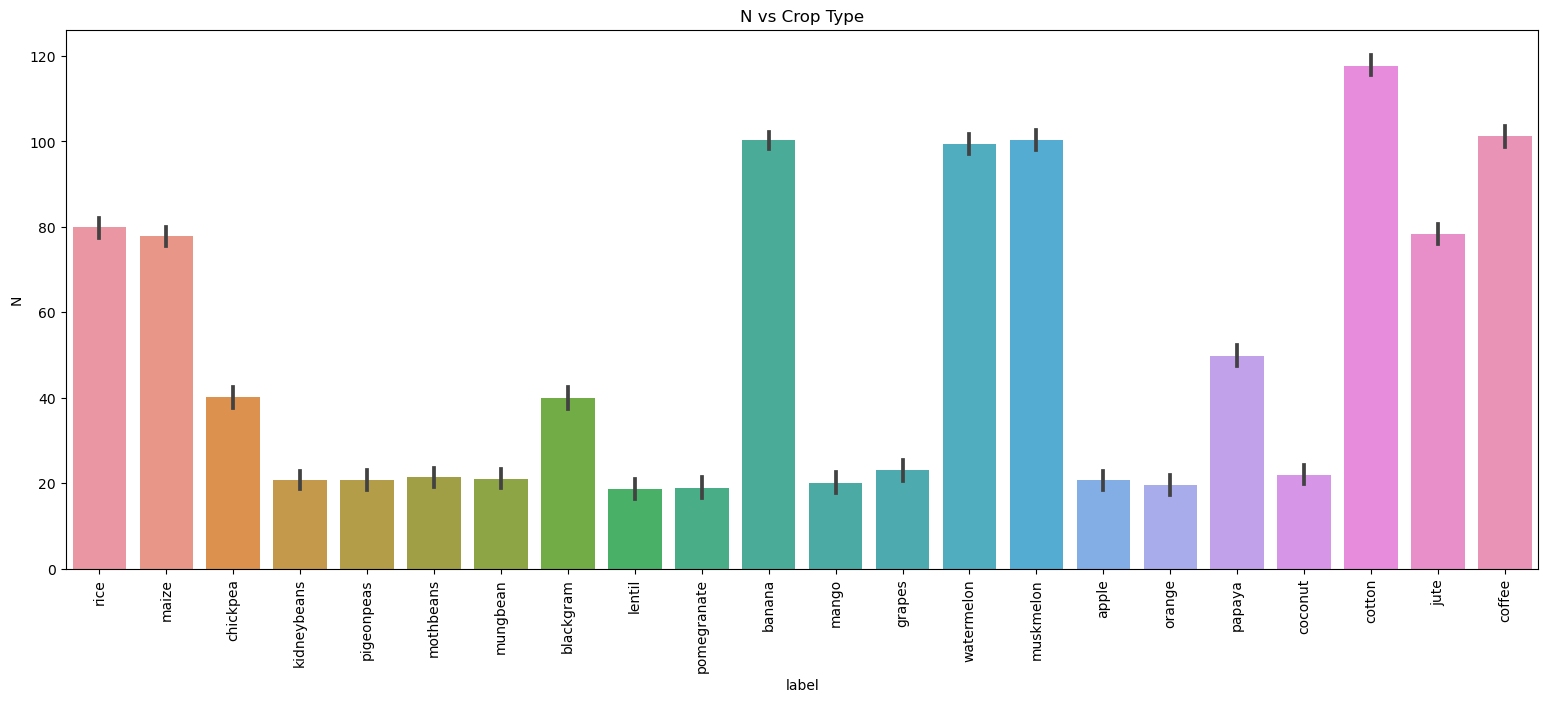

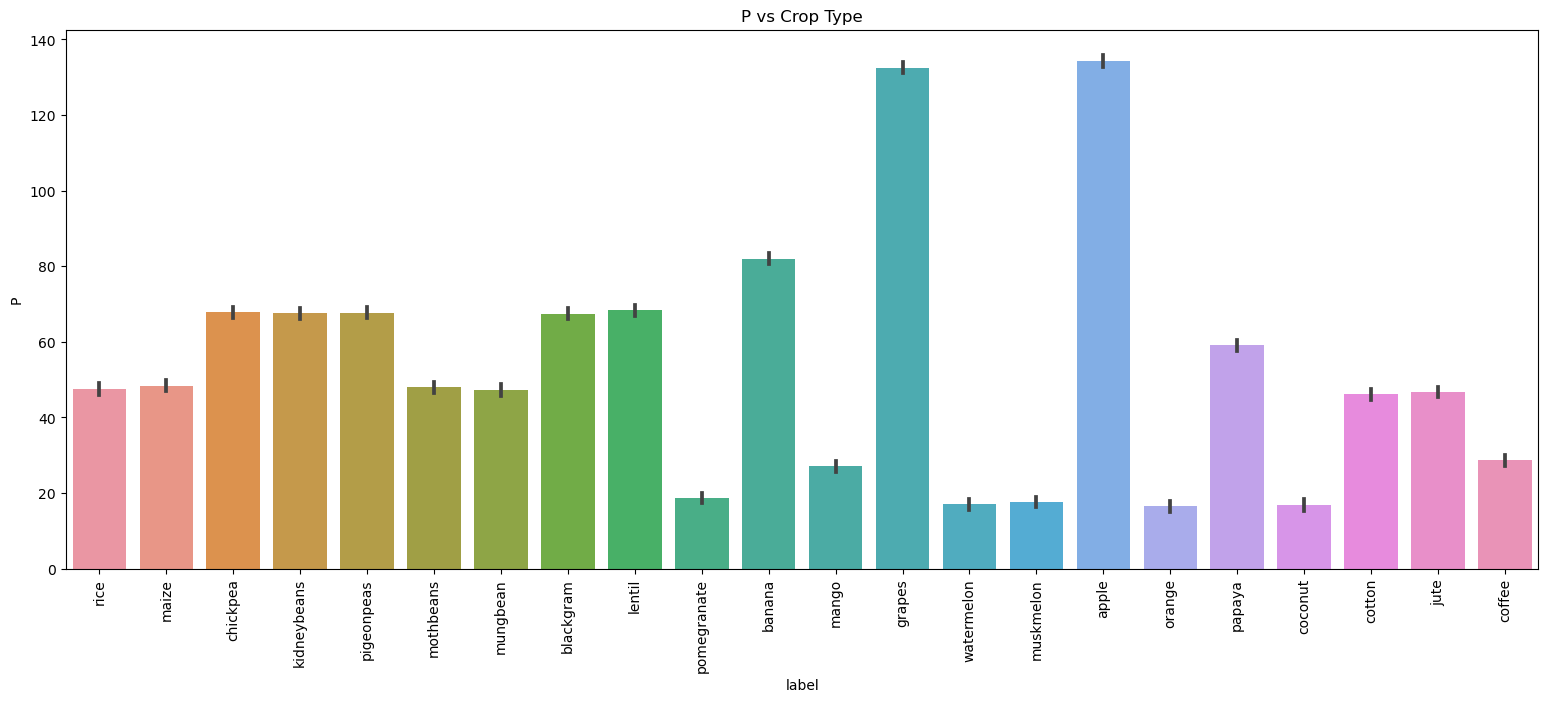

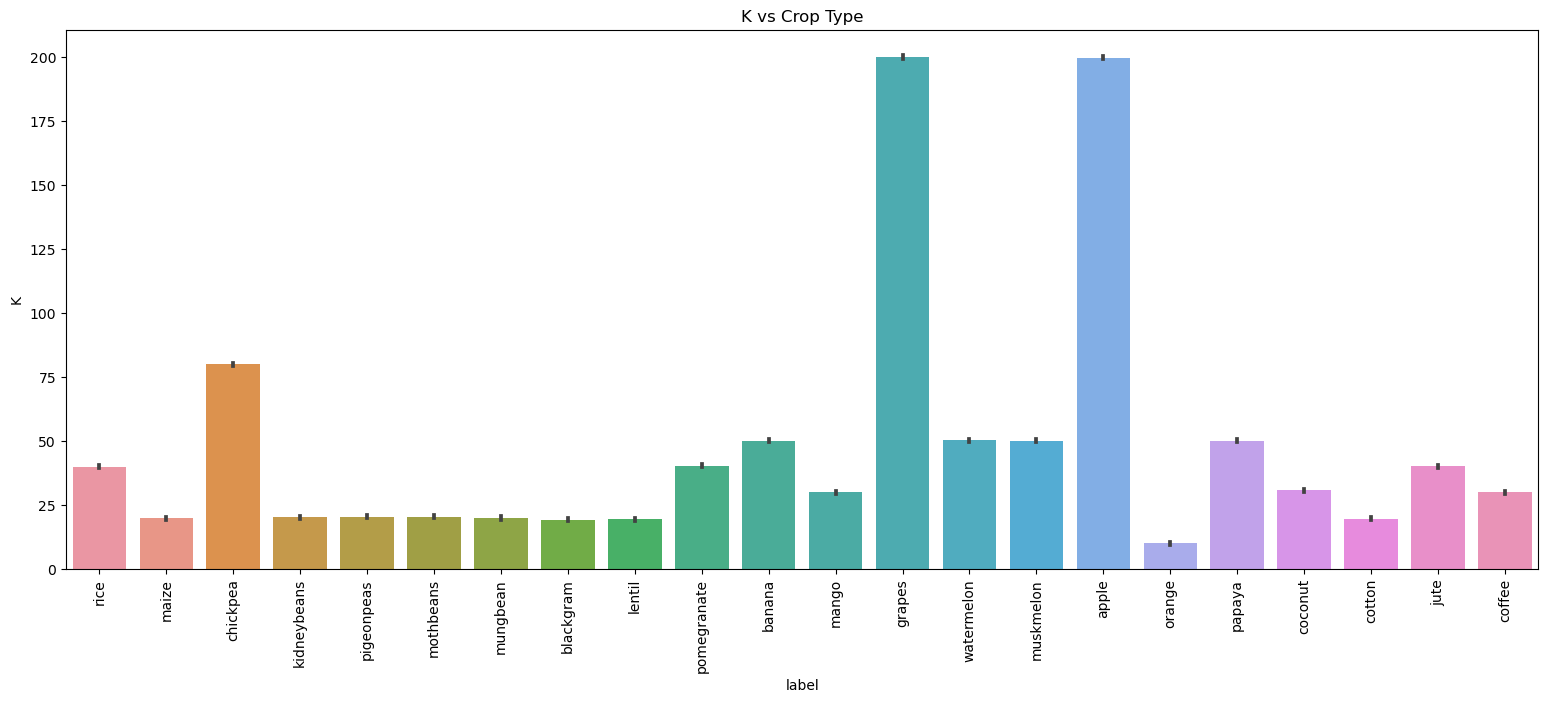

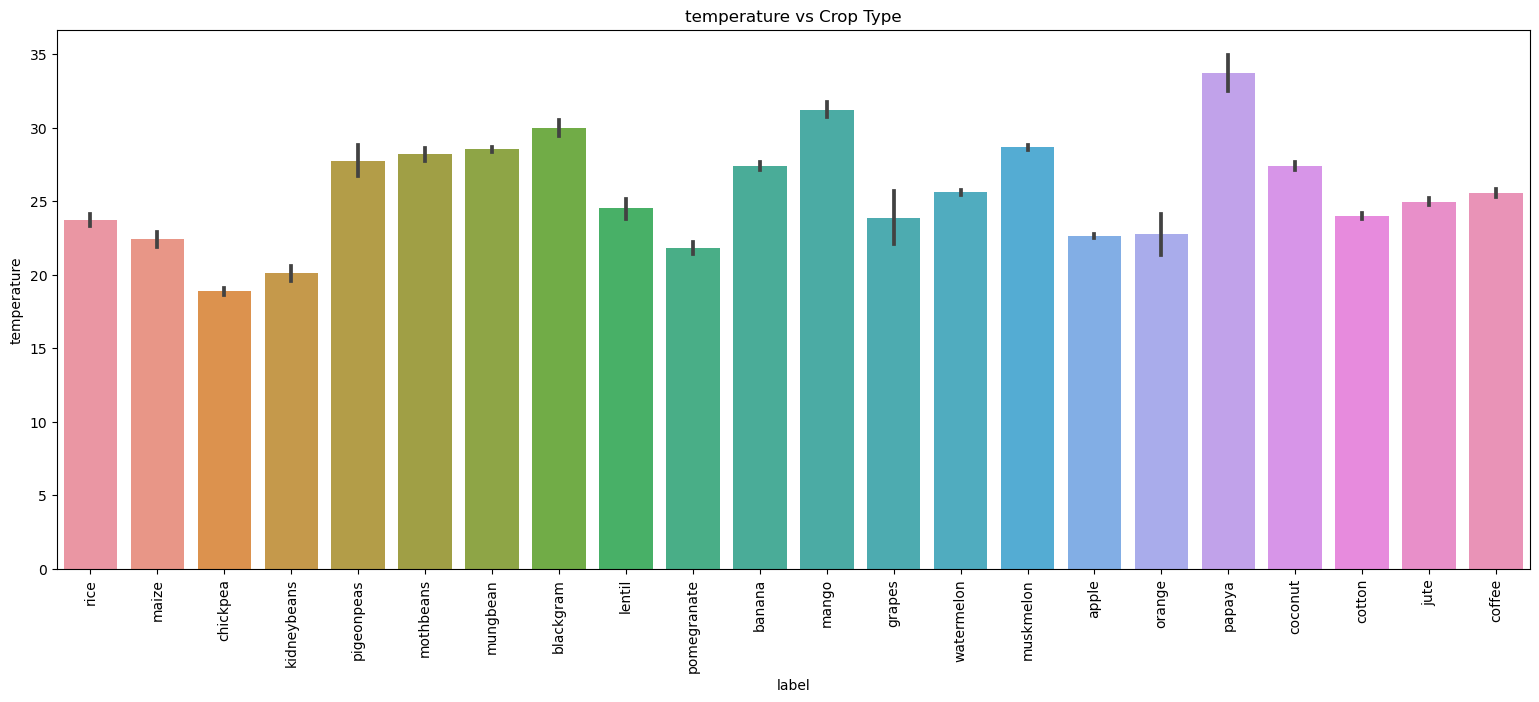

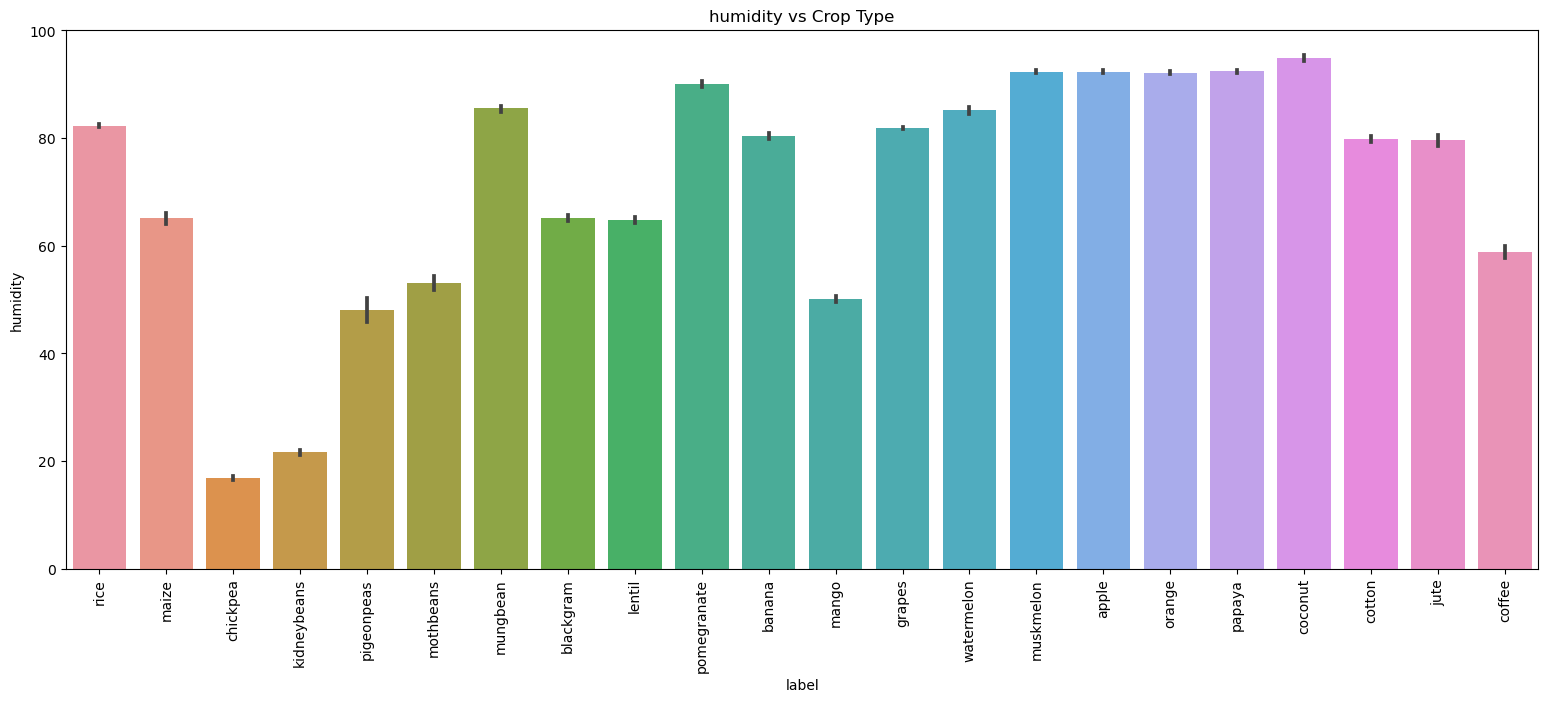

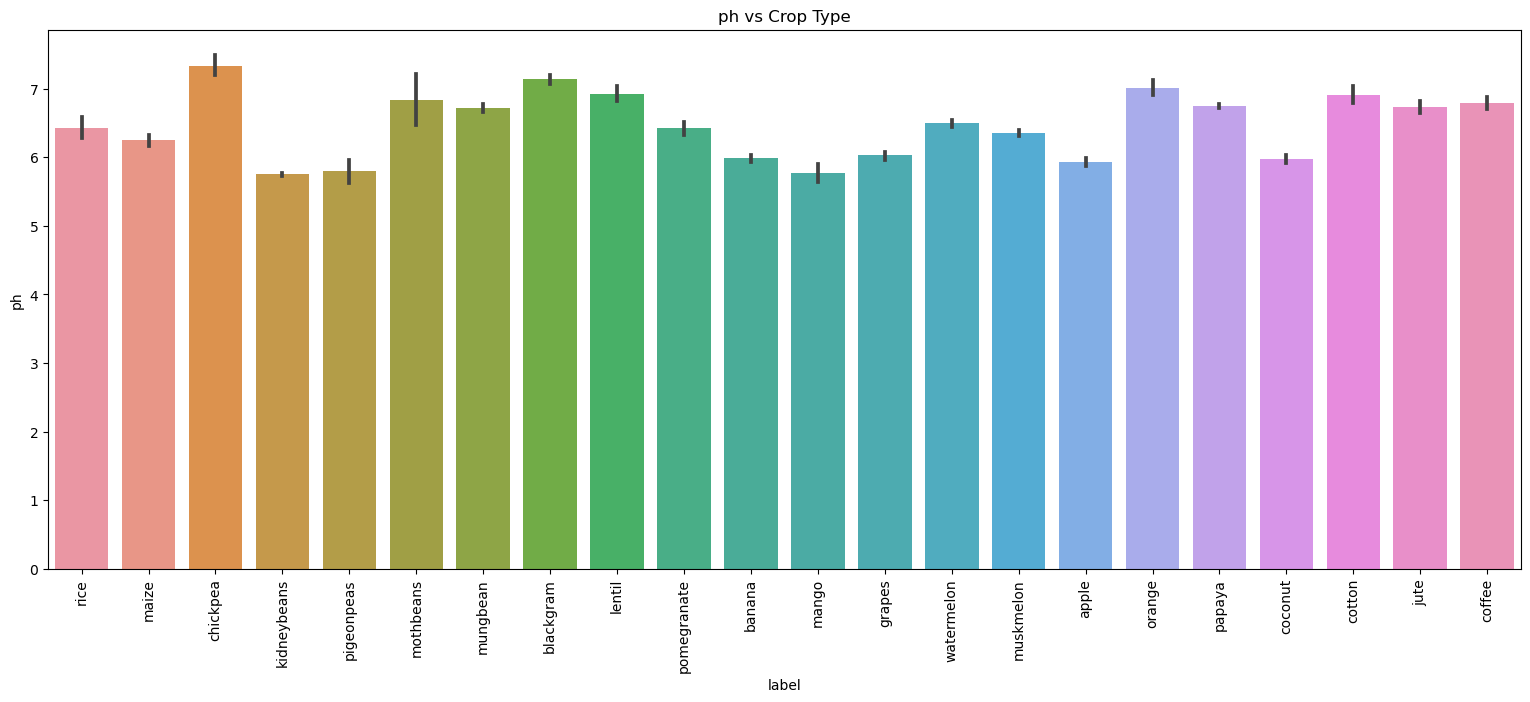

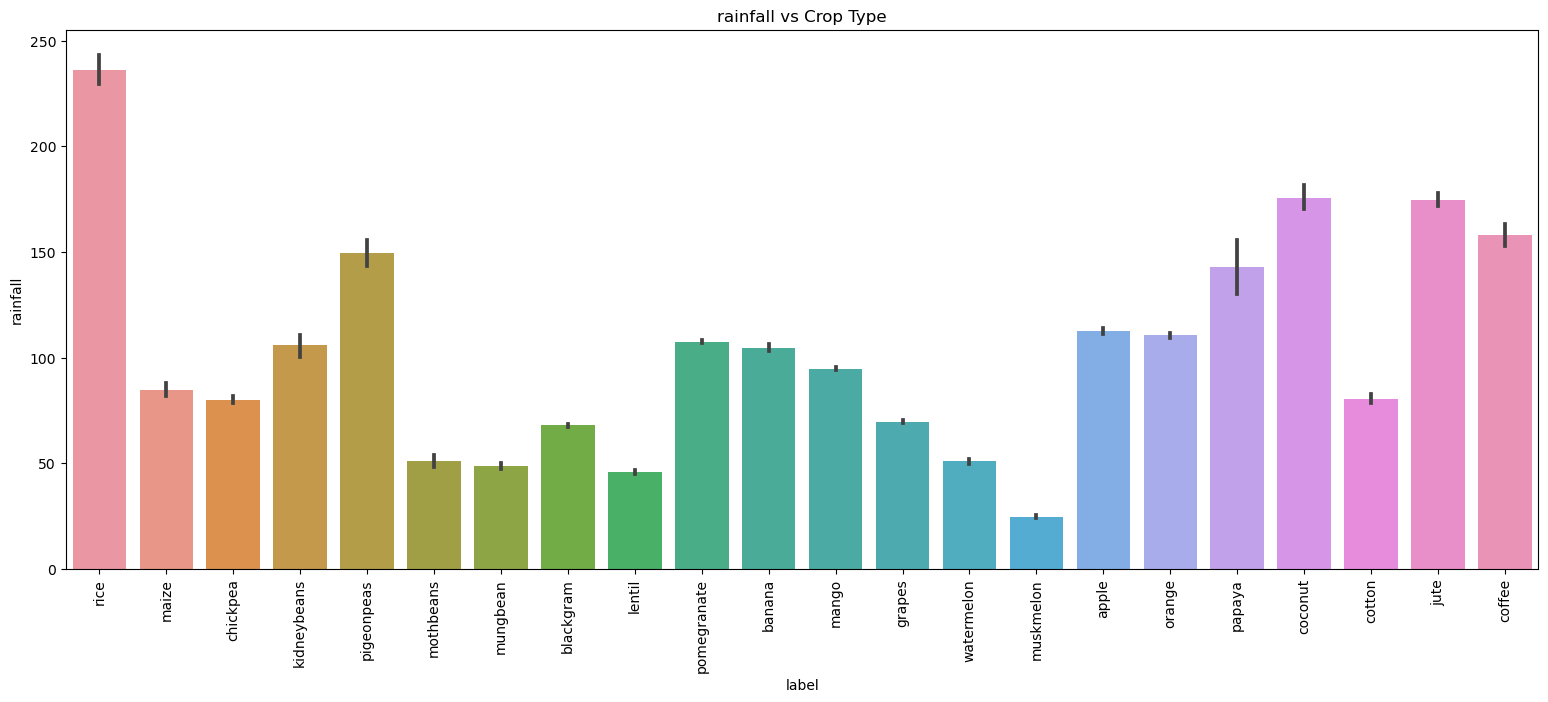

In [8]:
for column in col:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

<Figure size 1900x1700 with 0 Axes>

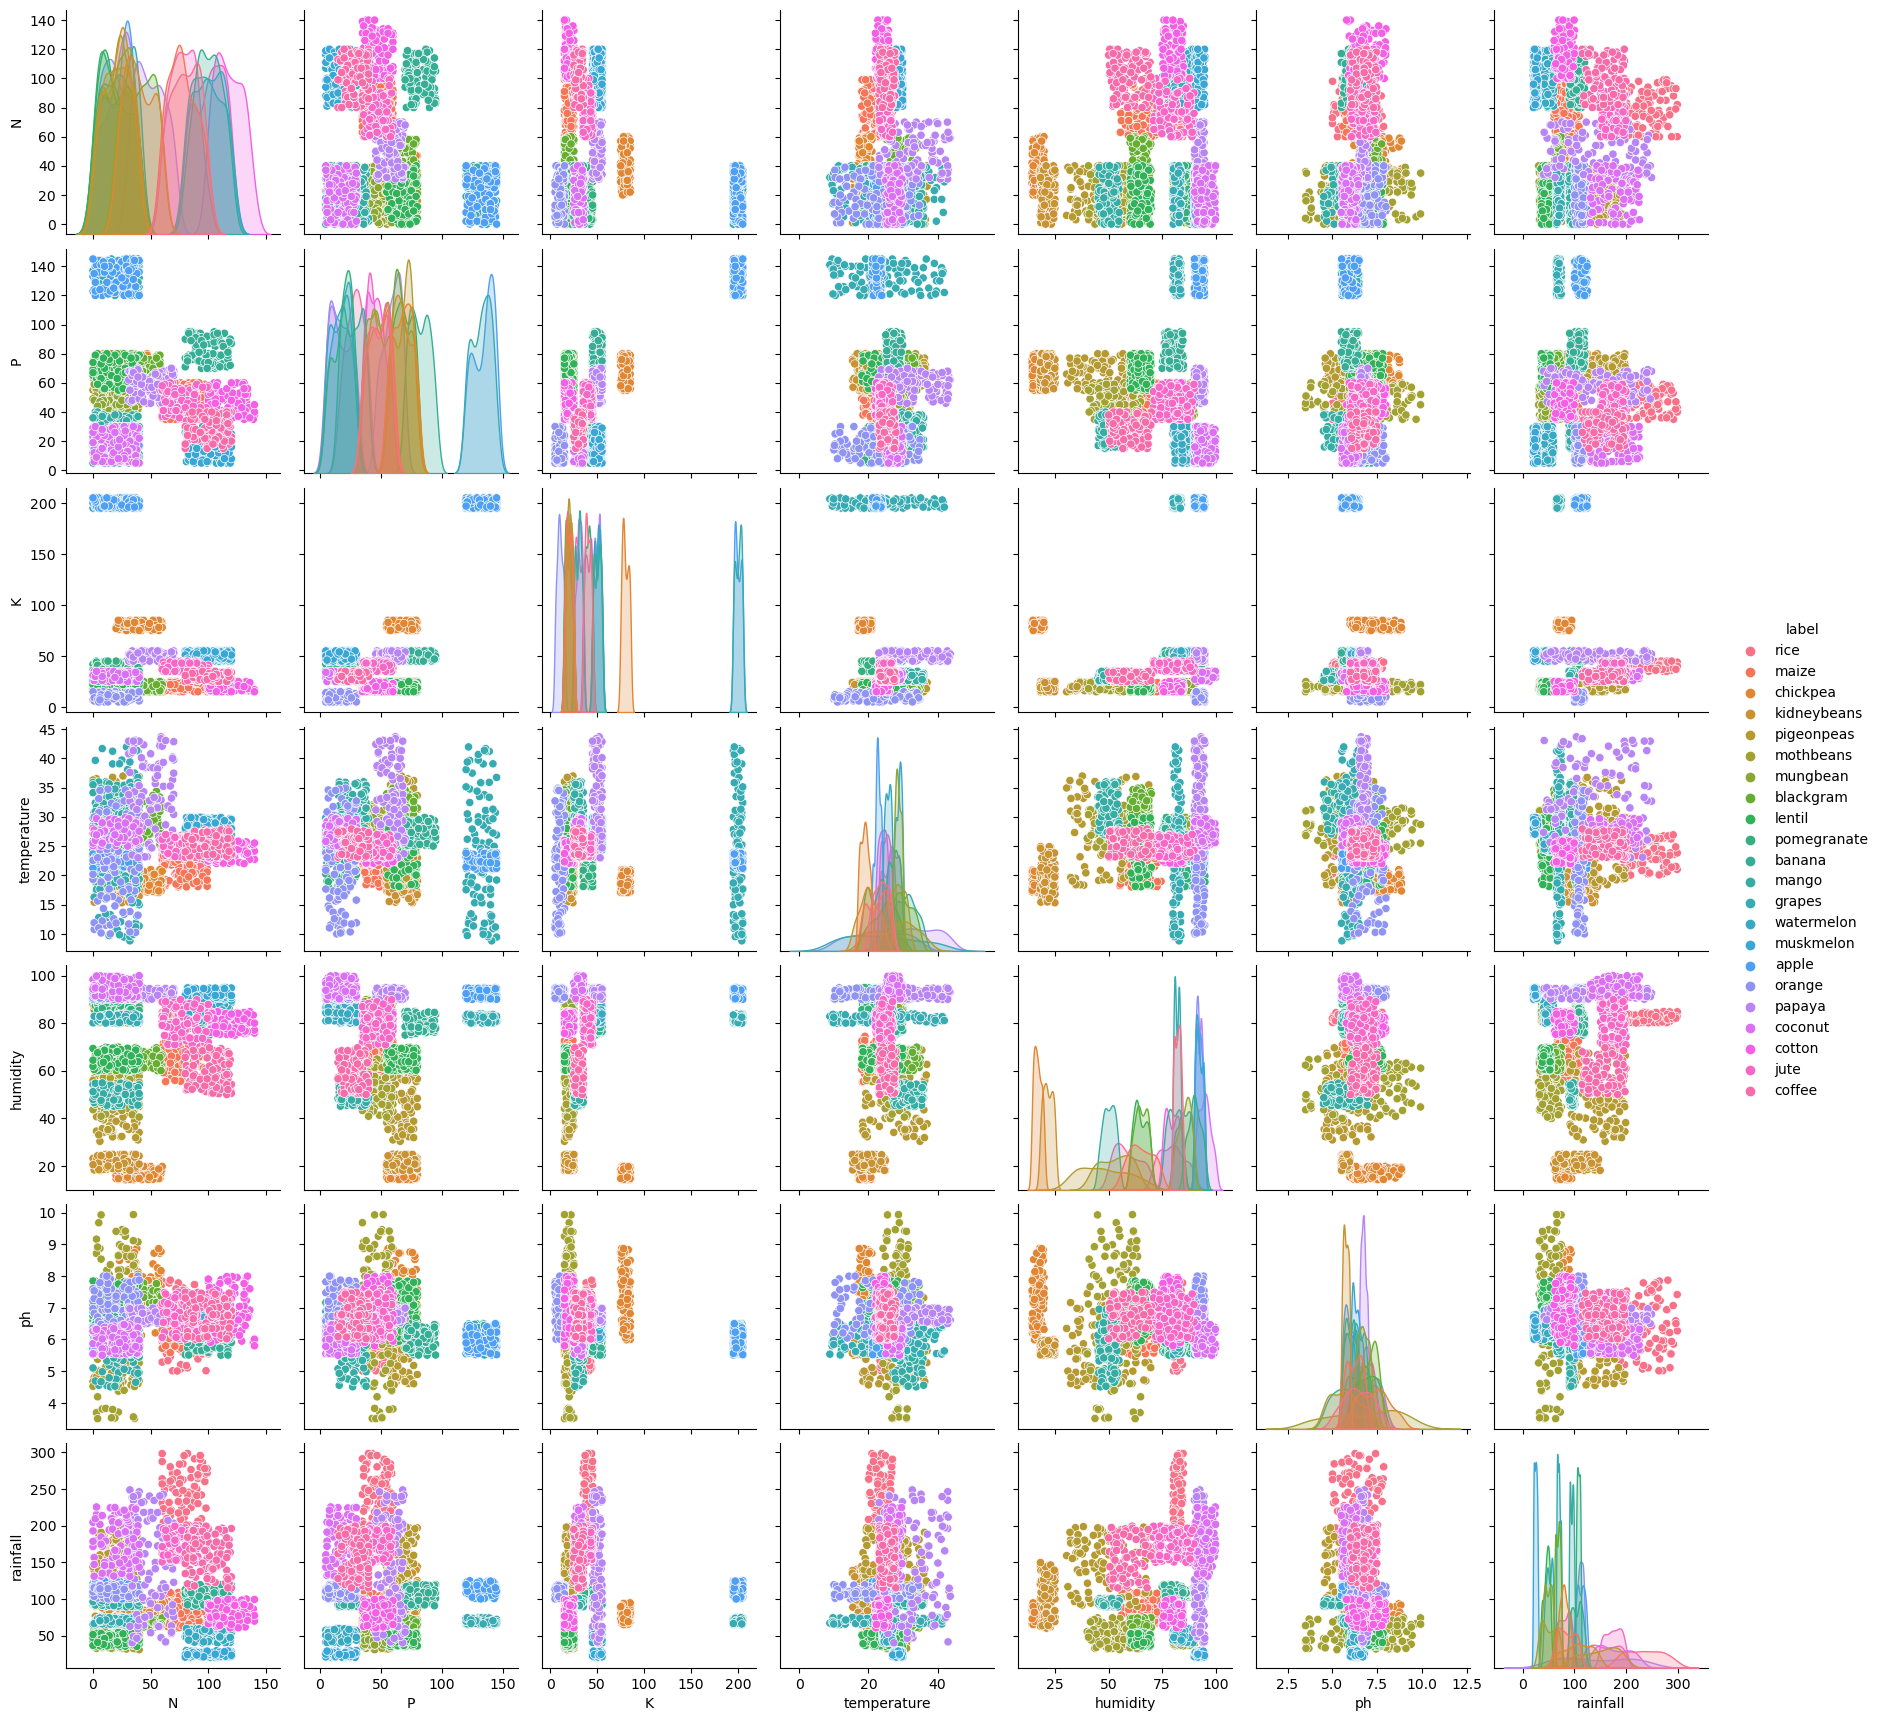

In [9]:
plt.figure(figsize=(19,17))
sns.pairplot(data, hue = "label")
plt.show()

In [10]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


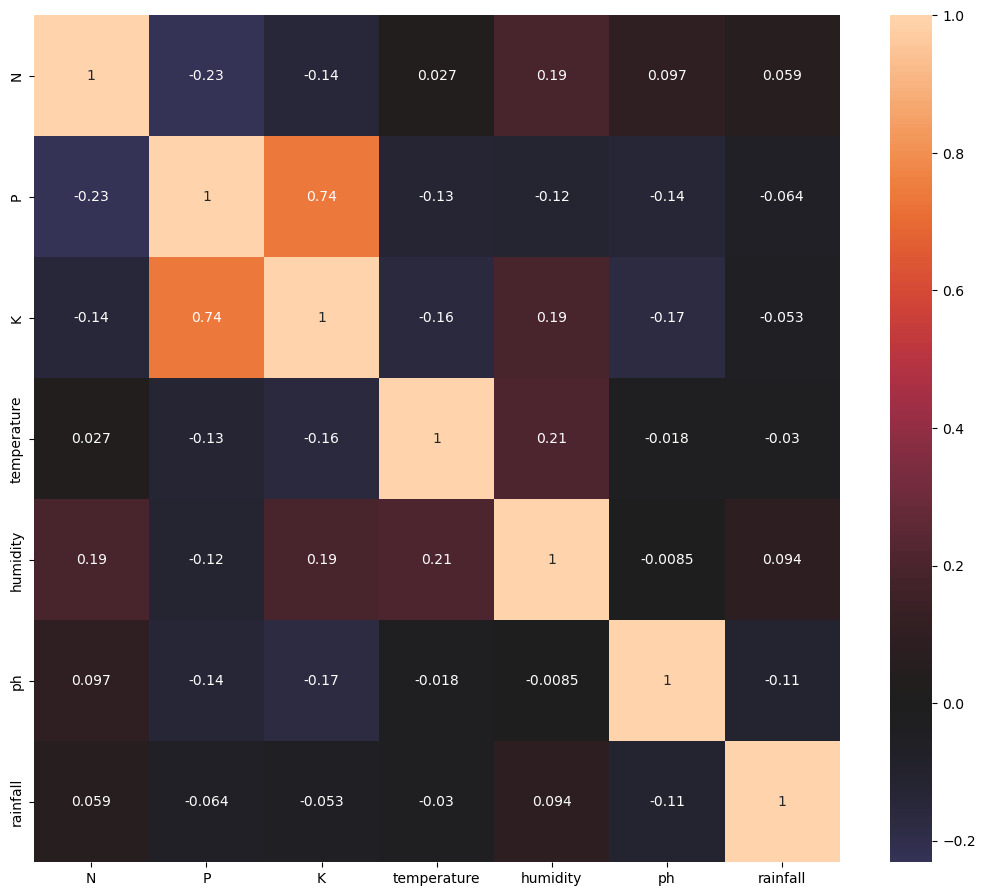

In [11]:
plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

<AxesSubplot:ylabel='Count'>

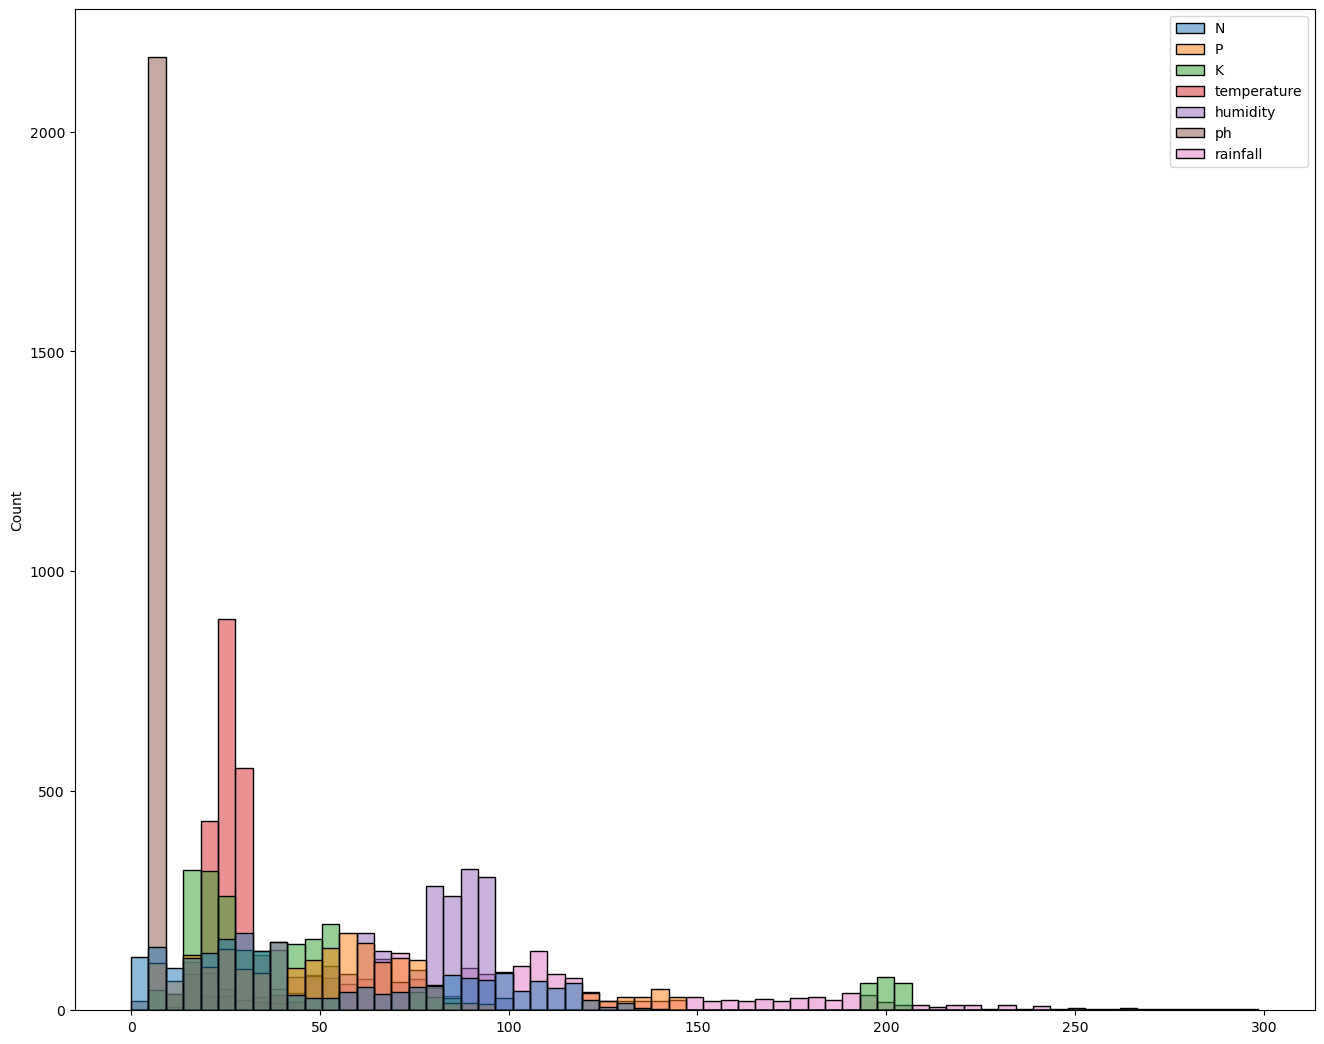

In [12]:
plt.figure(figsize=(16,13))
sns.histplot(data[col])

## Data Preprocessing

In [13]:
print("Unique Labels : \n",data["label"].unique())
print("\nLength : ",len(data["label"].unique()))

Unique Labels : 
 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Length :  22


In [14]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
x = scaler.fit_transform(data[col])
y = label_encoder.fit_transform(data["label"])
print(x.shape, y.shape)

(2200, 7) (2200,)


In [15]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


## Model Bulding

### Model 1

In [17]:
model_1 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model_1.add(keras.layers.Dense(64,input_shape=(7,),activation='relu'))
model_1.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model_1.add(keras.layers.Dense(22,input_shape=(7,),activation='softmax'))

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

his = model_1.fit(x=X_train,y=y_train,epochs=150,batch_size=50)

Epoch 1/150


2023-03-05 02:50:14.459389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 02:50:14.459411: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 02:50:14.459433: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (piyushLap): /proc/driver/nvidia/version does not exist
2023-03-05 02:50:14.459638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


36/36 [==============================] - 0s 621us/step - loss: 2.9058 - accuracy: 0.1790
Epoch 2/150
36/36 [==============================] - 0s 590us/step - loss: 2.3769 - accuracy: 0.3920
Epoch 3/150
36/36 [==============================] - 0s 578us/step - loss: 1.6581 - accuracy: 0.5591
Epoch 4/150
36/36 [==============================] - 0s 580us/step - loss: 1.0012 - accuracy: 0.7909
Epoch 5/150
36/36 [==============================] - 0s 594us/step - loss: 0.6254 - accuracy: 0.8682
Epoch 6/150
36/36 [==============================] - 0s 588us/step - loss: 0.4428 - accuracy: 0.8898
Epoch 7/150
36/36 [==============================] - 0s 584us/step - loss: 0.3383 - accuracy: 0.9187
Epoch 8/150
36/36 [==============================] - 0s 587us/step - loss: 0.2752 - accuracy: 0.9318
Epoch 9/150
36/36 [==============================] - 0s 593us/step - loss: 0.2318 - accuracy: 0.9381
Epoch 10/150
36/36 [==============================] - 0s 586us/step - loss: 0.2017 - accuracy: 0.9466
E

36/36 [==============================] - 0s 584us/step - loss: 0.0223 - accuracy: 0.9943
Epoch 82/150
36/36 [==============================] - 0s 581us/step - loss: 0.0180 - accuracy: 0.9943
Epoch 83/150
36/36 [==============================] - 0s 583us/step - loss: 0.0193 - accuracy: 0.9937
Epoch 84/150
36/36 [==============================] - 0s 572us/step - loss: 0.0229 - accuracy: 0.9903
Epoch 85/150
36/36 [==============================] - 0s 582us/step - loss: 0.0198 - accuracy: 0.9960
Epoch 86/150
36/36 [==============================] - 0s 571us/step - loss: 0.0216 - accuracy: 0.9920
Epoch 87/150
36/36 [==============================] - 0s 569us/step - loss: 0.0185 - accuracy: 0.9943
Epoch 88/150
36/36 [==============================] - 0s 566us/step - loss: 0.0168 - accuracy: 0.9949
Epoch 89/150
36/36 [==============================] - 0s 577us/step - loss: 0.0269 - accuracy: 0.9903
Epoch 90/150
36/36 [==============================] - 0s 573us/step - loss: 0.0188 - accuracy: 

### Model 1 Evaluation

In [18]:
print("\nModel 1 Evaluation : ",model_1.evaluate(X_test,y_test))

14/14 [==============================] - 0s 603us/step - loss: 0.0493 - accuracy: 0.9932

Model 1 Evaluation :  [0.04931836947798729, 0.9931818246841431]


14/14 [==============================] - 0s 454us/step


<AxesSubplot:title={'center':'Confusion Matrix for Model 1 on Test dataset'}>

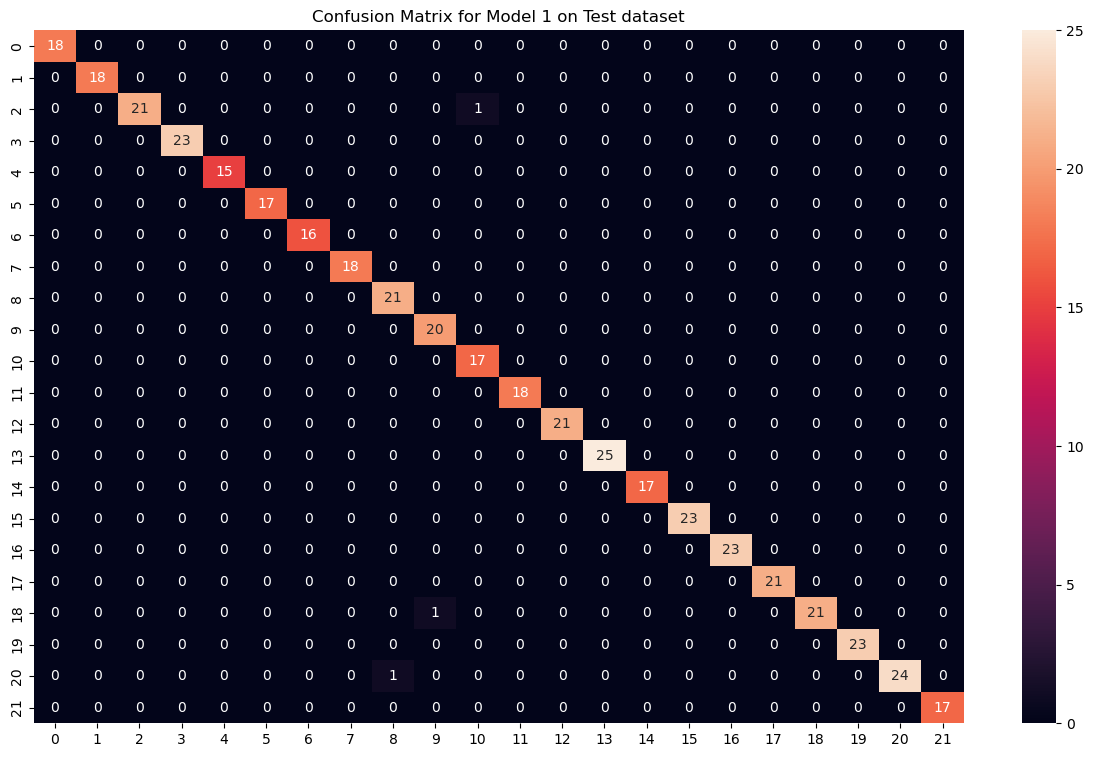

In [19]:
plt.figure(figsize = (15,9))
plt.title("Confusion Matrix for Model 1 on Test dataset")
sns.heatmap(confusion_matrix(y_test, np.argmax(model_1.predict(X_test),axis=1)), annot = True)

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                1856      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 dense_3 (Dense)             (None, 22)                638       
                                                                 
Total params: 4,538
Trainable params: 4,538
Non-trainable params: 0
_________________________________________________________________


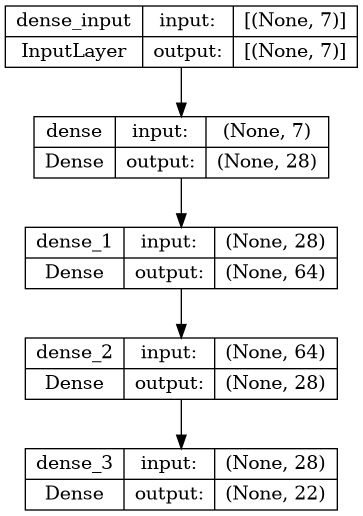

In [21]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

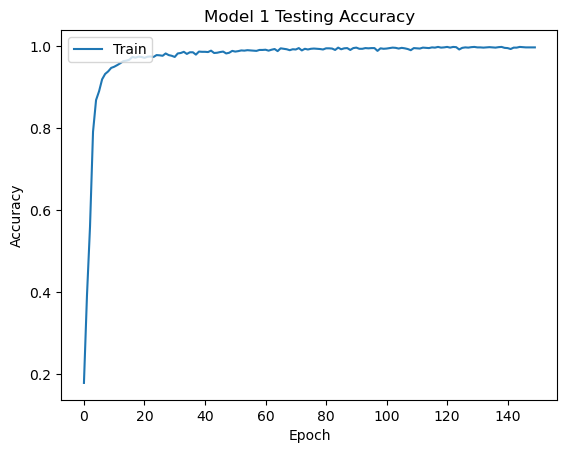

In [22]:
plt.plot(his.history['accuracy'])
plt.title("Model 1 Testing Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

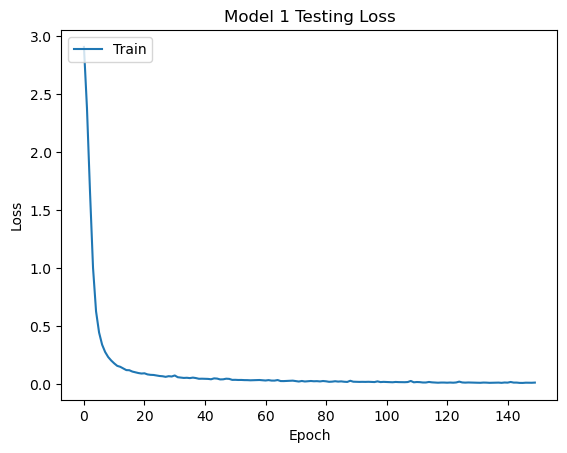

In [23]:
plt.plot(his.history['loss'])
plt.title("Model 1 Testing Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [24]:
print(classification_report(y_test, np.argmax(model_1.predict(X_test),axis=1)))

14/14 [==============================] - 0s 452us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.95      1.00      0.98        21
           9       0.95      1.00      0.98        20
          10       0.94      1.00      0.97        17
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00   

### Model 2

In [25]:
model_2 = tf.keras.Sequential()
model_2.add(keras.layers.Dense(8,input_shape=(7,),activation='relu'))
model_2.add(keras.layers.Dense(16,input_shape=(7,),activation='relu'))
model_2.add(keras.layers.Dense(22,input_shape=(7,),activation='softmax'))

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

his = model_2.fit(x=X_train,y=y_train,epochs=100,batch_size=10)

Epoch 1/100
176/176 [==============================] - 0s 477us/step - loss: 2.9647 - accuracy: 0.1028
Epoch 2/100
176/176 [==============================] - 0s 469us/step - loss: 2.4246 - accuracy: 0.2977
Epoch 3/100
176/176 [==============================] - 0s 450us/step - loss: 1.7871 - accuracy: 0.4335
Epoch 4/100
176/176 [==============================] - 0s 455us/step - loss: 1.3099 - accuracy: 0.6239
Epoch 5/100
176/176 [==============================] - 0s 458us/step - loss: 0.9961 - accuracy: 0.7284
Epoch 6/100
176/176 [==============================] - 0s 457us/step - loss: 0.7857 - accuracy: 0.7801
Epoch 7/100
176/176 [==============================] - 0s 476us/step - loss: 0.6368 - accuracy: 0.8284
Epoch 8/100
176/176 [==============================] - 0s 476us/step - loss: 0.5265 - accuracy: 0.8608
Epoch 9/100
176/176 [==============================] - 0s 460us/step - loss: 0.4473 - accuracy: 0.8869
Epoch 10/100
176/176 [==============================] - 0s 464us/step - l

176/176 [==============================] - 0s 848us/step - loss: 0.0324 - accuracy: 0.9903
Epoch 80/100
176/176 [==============================] - 0s 859us/step - loss: 0.0319 - accuracy: 0.9892
Epoch 81/100
176/176 [==============================] - 0s 846us/step - loss: 0.0319 - accuracy: 0.9886
Epoch 82/100
176/176 [==============================] - 0s 861us/step - loss: 0.0315 - accuracy: 0.9886
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9875
Epoch 84/100
176/176 [==============================] - 0s 922us/step - loss: 0.0313 - accuracy: 0.9898
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9909
Epoch 86/100
176/176 [==============================] - 0s 969us/step - loss: 0.0326 - accuracy: 0.9869
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9881
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0305 

### Model 2 Evaluation

In [26]:
print("\nModel 2 Evaluation : ",model_2.evaluate(X_test,y_test))

14/14 [==============================] - 0s 970us/step - loss: 0.0459 - accuracy: 0.9795

Model 2 Evaluation :  [0.04592075198888779, 0.9795454740524292]


14/14 [==============================] - 0s 882us/step


<AxesSubplot:title={'center':'Confusion Matrix for Model 2 on Test dataset'}>

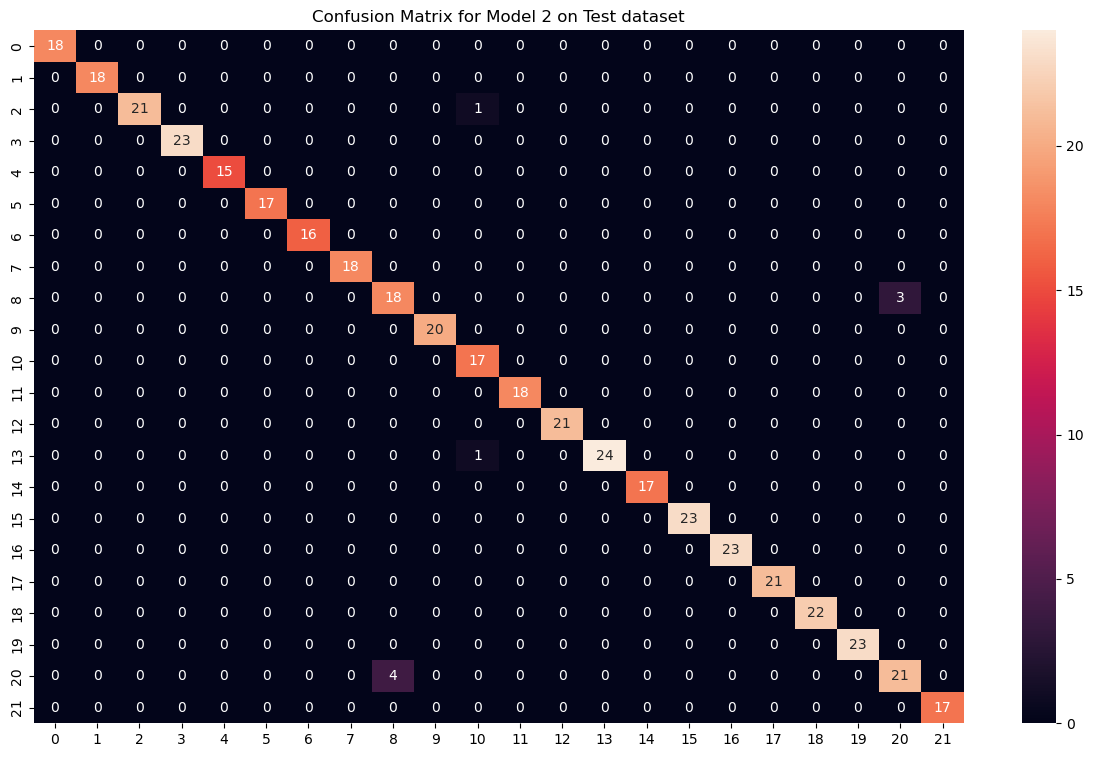

In [27]:
plt.figure(figsize = (15,9))
plt.title("Confusion Matrix for Model 2 on Test dataset")
sns.heatmap(confusion_matrix(y_test, np.argmax(model_2.predict(X_test),axis=1)), annot = True)

In [28]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 64        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 22)                374       
                                                                 
Total params: 582
Trainable params: 582
Non-trainable params: 0
_________________________________________________________________


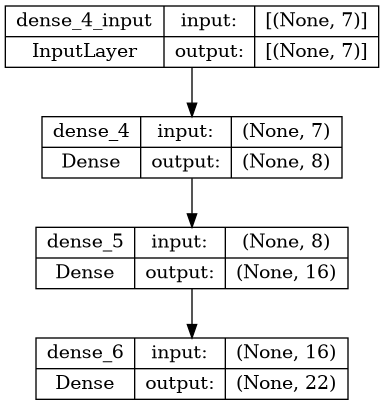

In [29]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

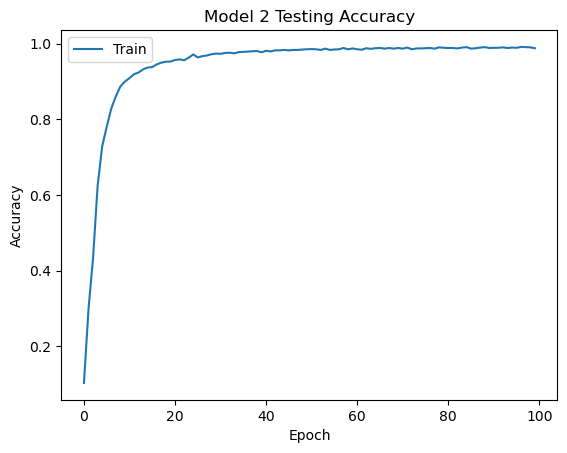

In [30]:
plt.plot(his.history['accuracy'])
plt.title("Model 2 Testing Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

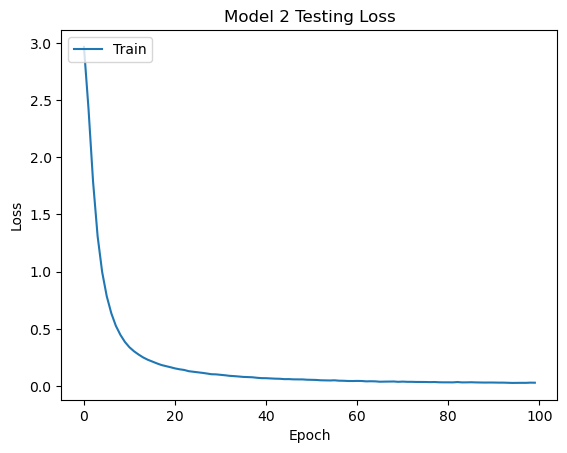

In [31]:
plt.plot(his.history['loss'])
plt.title("Model 2 Testing Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [32]:
print(classification_report(y_test, np.argmax(model_2.predict(X_test),axis=1)))

14/14 [==============================] - 0s 827us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.82      0.86      0.84        21
           9       1.00      1.00      1.00        20
          10       0.89      1.00      0.94        17
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00   